# Análisis dataset diamonds

In [246]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [247]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Análisis univariante

* sns.displot()
* sns.ecdfplot()
* sns.countplot()
* sns.kdeplot()
* sns.rugplot()
* sns.countplot()
* sns.boxplot()

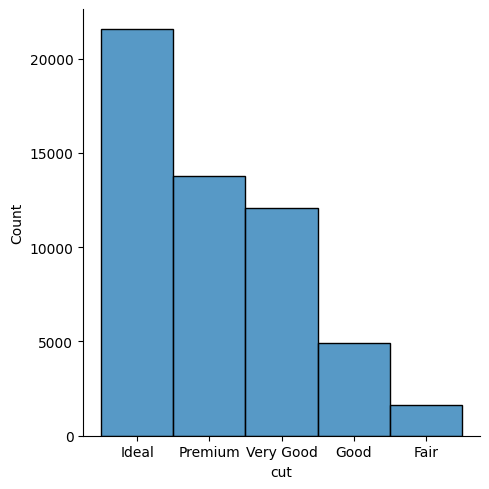

In [248]:
sns.displot(data=df, x='cut')

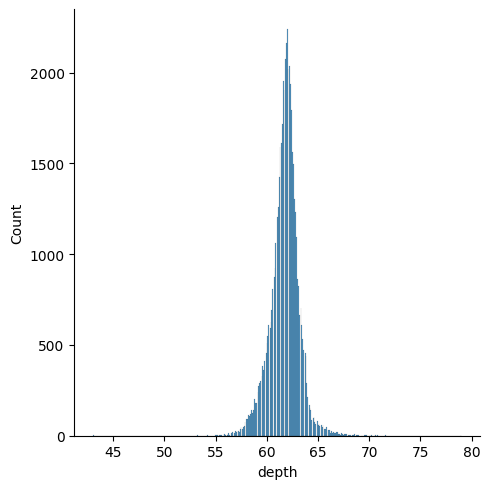

In [249]:
sns.displot(data=df, x='depth')

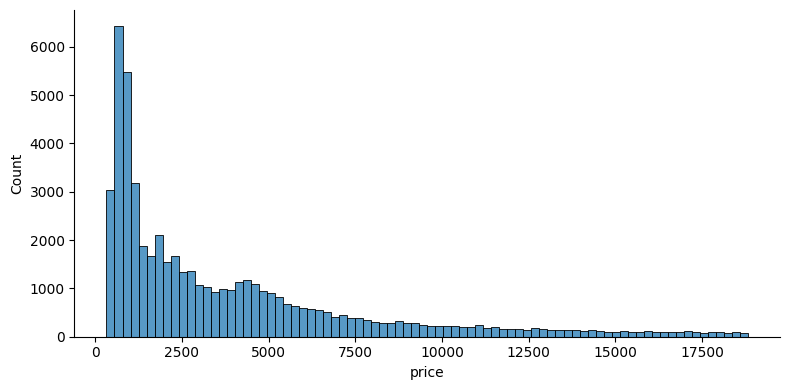

In [250]:
sns.displot(data=df, x='price', height=4, aspect=2) # ny halavany sy angezany

In [251]:
print(df['cut'].unique())
print(df['clarity'].unique())


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']


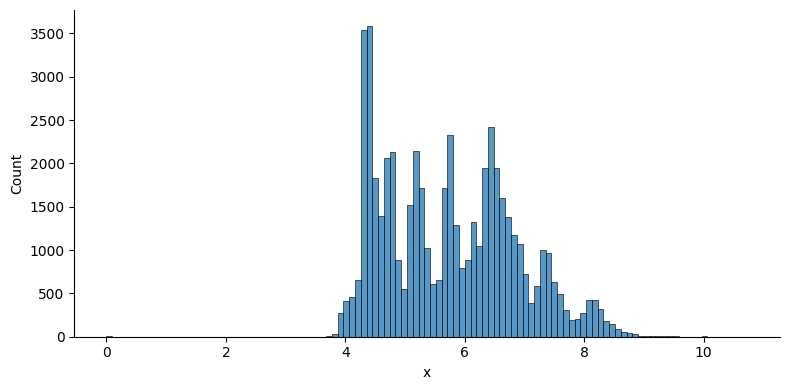

In [252]:
sns.displot(data=df, x='x', height=4, aspect=2)

[Text(0, 0, '21551'),
 Text(0, 0, '13791'),
 Text(0, 0, '12082'),
 Text(0, 0, '4906'),
 Text(0, 0, '1610')]

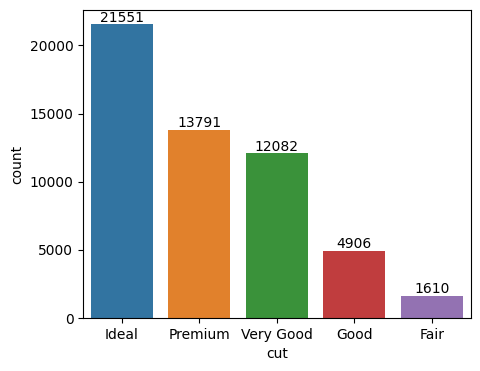

In [253]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='cut')
ax.bar_label(ax.containers[0])

(2.0, 10.0)

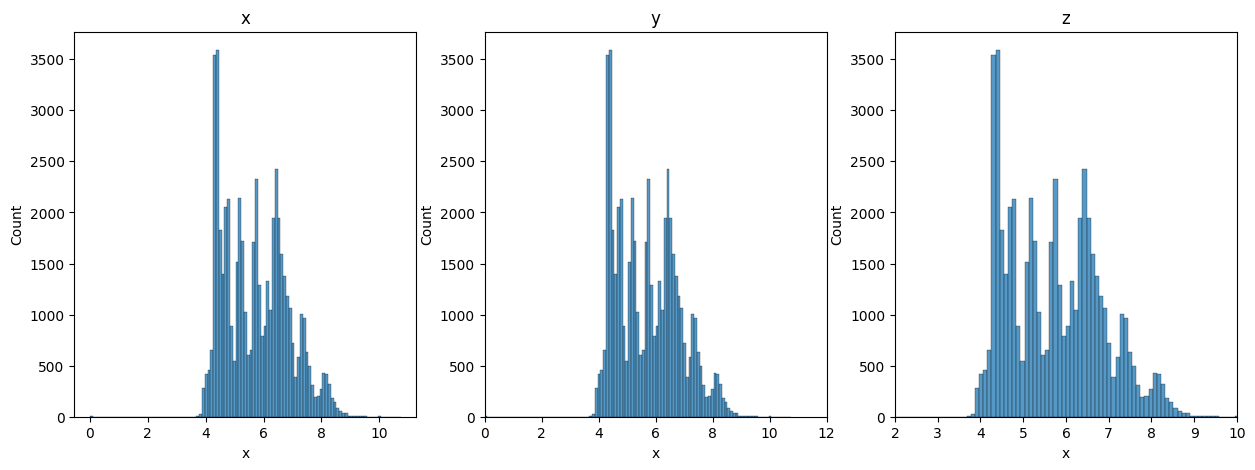

In [254]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

#displot no deja porque tiene su propia gráfic no se puede añadir en subplots
sns.histplot(data=df, x='x', ax=axes[0])
axes[0].set_title('x')

sns.histplot(data=df, x='x', ax=axes[1])
axes[1].set_title('y')
axes[1].set_xlim([0, 12]) # cambiar los límites del eje x

sns.histplot(data=df, x='x', ax=axes[2])
axes[2].set_title('z')
axes[2].set_xlim([2, 10])

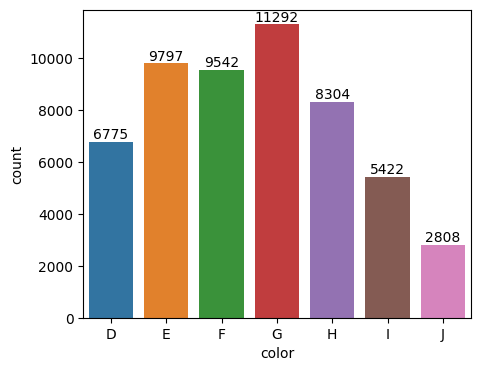

In [255]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='color')
ax.bar_label(ax.containers[0]);

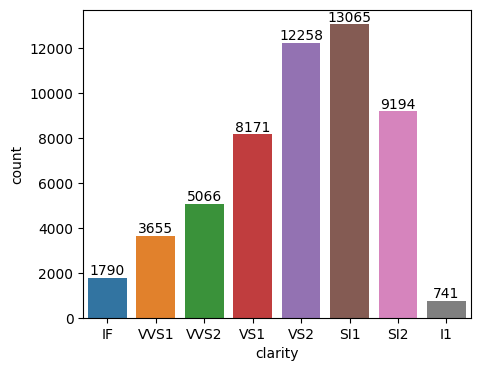

In [256]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='clarity')
ax.bar_label(ax.containers[0]);

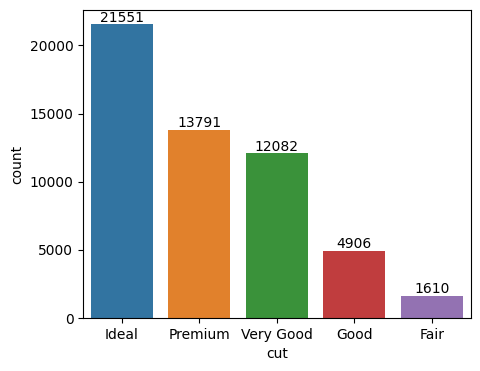

In [257]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='cut')
ax.bar_label(ax.containers[0]);

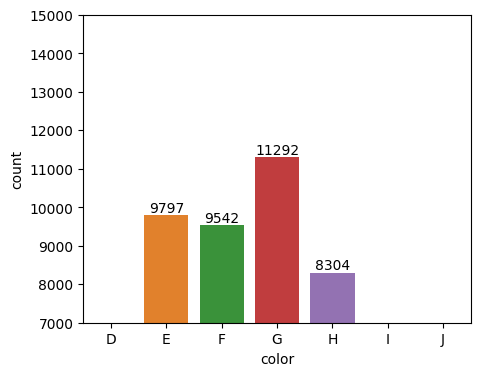

In [258]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df, x='color')
ax.set_ylim([7000, 15000]) # ferana ny datos avoaka. Manombok amn 7000 k@ 12000
ax.bar_label(ax.containers[0]);

In [259]:
df['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [260]:
df['clarity'].value_counts().index
# mitovy fa ny fomba filaharany no mahasamihafa azy

CategoricalIndex(['SI1', 'VS2', 'SI2', 'VS1', 'VVS2', 'VVS1', 'IF', 'I1'], categories=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'], ordered=False, dtype='category')

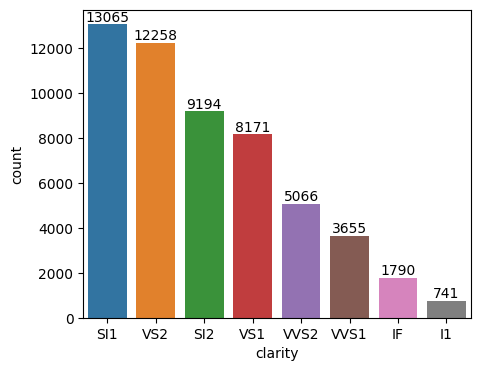

In [261]:
plt.figure(figsize=(5,4))
order = df['clarity'].value_counts(ascending=False).index
ax = sns.countplot(data=df, x='clarity', order=order)
ax.bar_label(ax.containers[0]);

<Axes: xlabel='depth', ylabel='Density'>

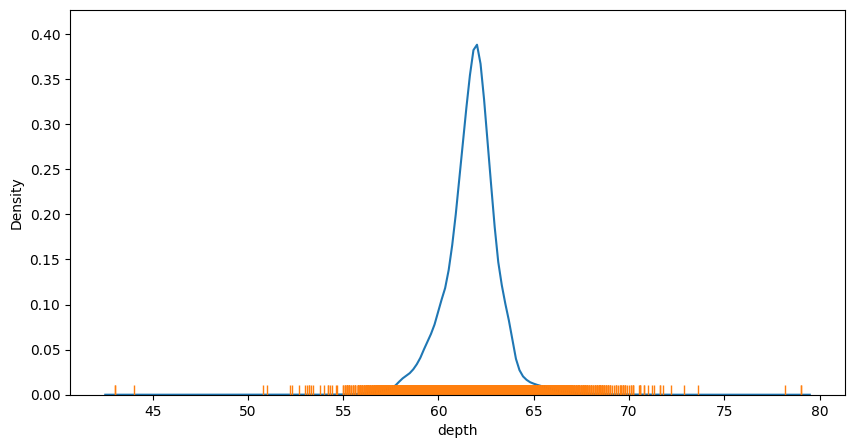

In [262]:
plt.figure(figsize=(10,5), dpi=100)
sns.kdeplot(data=df, x='depth')
sns.rugplot(data=df, x='depth')

<Axes: xlabel='price', ylabel='Proportion'>

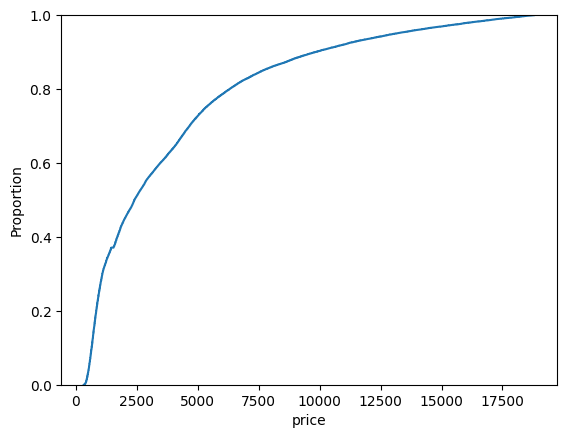

In [263]:
sns.ecdfplot(data=df, x='price')

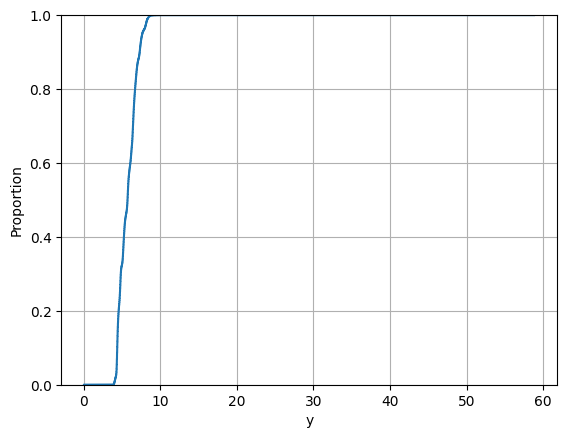

In [264]:
sns.ecdfplot(data=df, x='y')
plt.grid() # mitovy amle eo ambony fa mampiavaka azy manisy ilay carré carré kely ireny

<Axes: xlabel='price'>

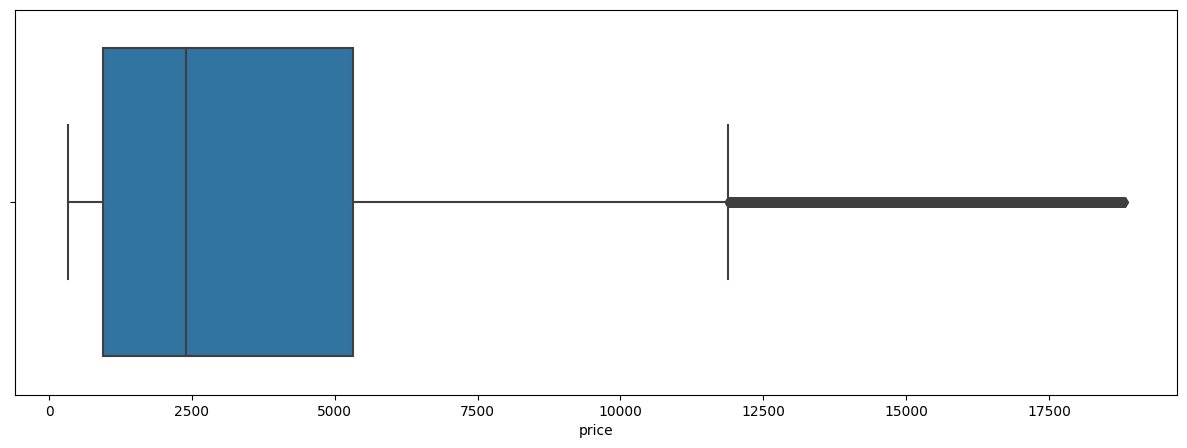

In [265]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, x='price') # horizontal

<Axes: ylabel='price'>

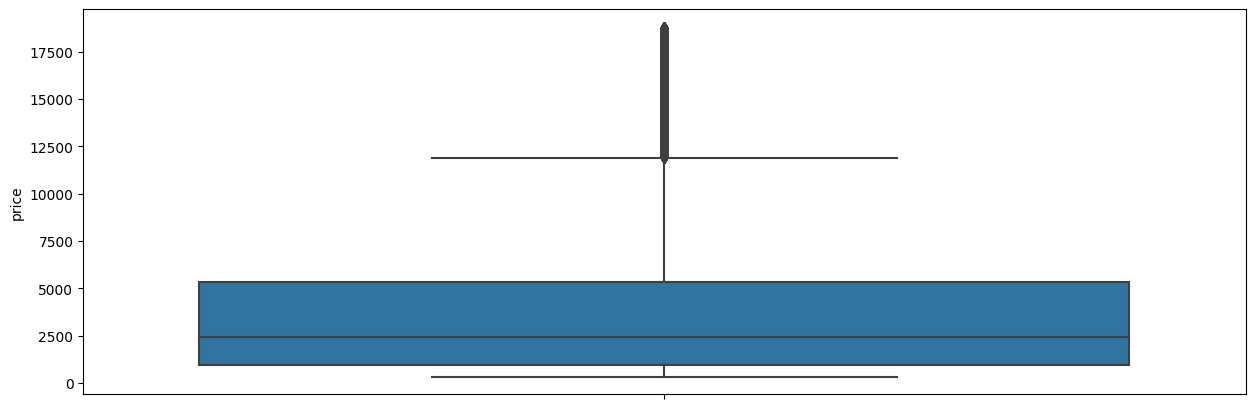

In [266]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df, y='price') # vertical

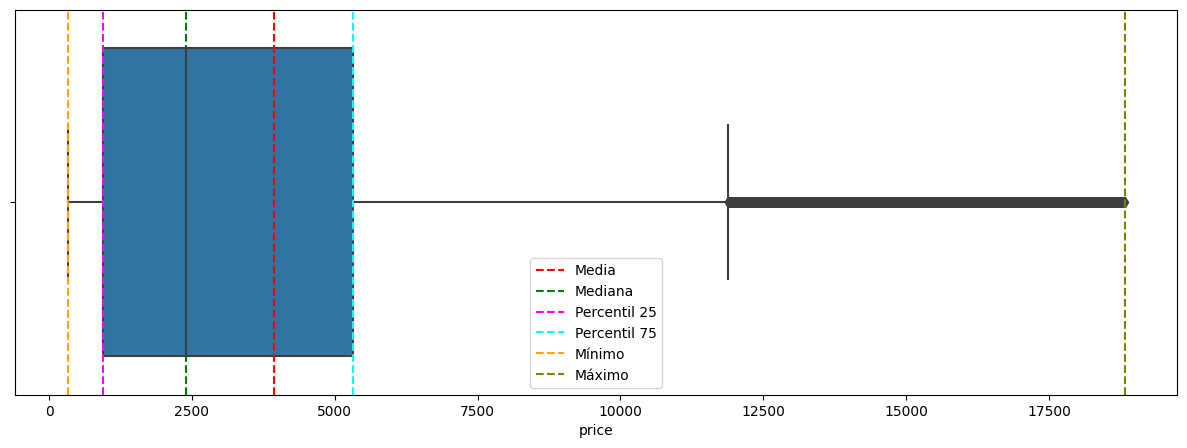

In [267]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x='price')
mean_line = plt.axvline(df['price'].mean(), color='r', linestyle='--')
median_line = plt.axvline(df['price'].median(), color='g', linestyle='--')
p25_line = plt.axvline(df['price'].quantile(0.25), color='magenta', linestyle='--')
p75_line = plt.axvline(df['price'].quantile(0.75), color='cyan', linestyle='--')
min_line = plt.axvline(df['price'].min(), color="orange", linestyle="--")
max_line = plt.axvline(df['price'].max(), color="olive", linestyle="--")

plt.legend(
    [mean_line, median_line, p25_line, p75_line, min_line, max_line], 
    ['Media', 'Mediana', 'Percentil 25', 'Percentil 75', 'Mínimo', 'Máximo']
    )

## Análisis de bivariante

Gráficosnque analizan 2 variantes al mismo tiempo

* sns.relplot()
* sns.jointplot()
* sns.lineplot()
* sns.rugplot()
* sns.barplot()
* sns.boxplot()

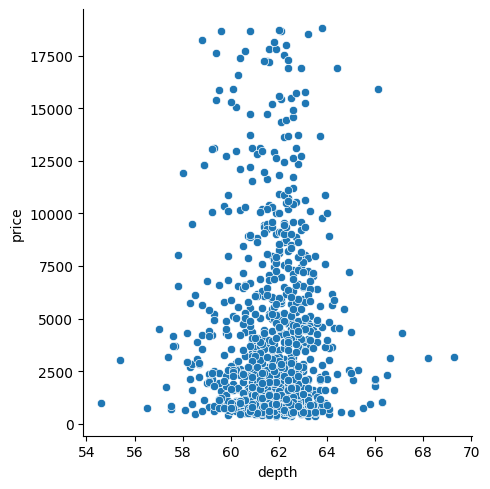

In [268]:
df_sample = df.sample(1000)
sns.relplot(data=df_sample, x='depth', y='price')

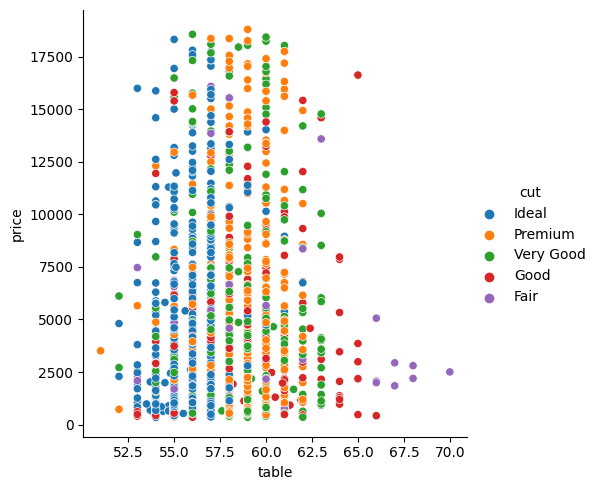

In [269]:
df_sample = df.sample(2000)
sns.relplot(data=df_sample, x='table', y='price', hue='cut')
# el hue='cut' es lo que da color diferentes a los puntitos

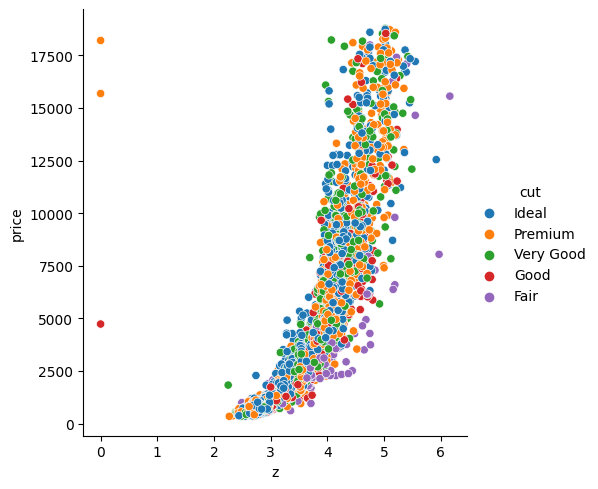

In [270]:
# en miligramos
# 0.5 gramos = 500g
df_sample = df.sample(5000)
sns.relplot(data=df_sample, x='z', y='price', hue='cut')

Text(0.5, 1.0, 'Relación entre precio y quilates')

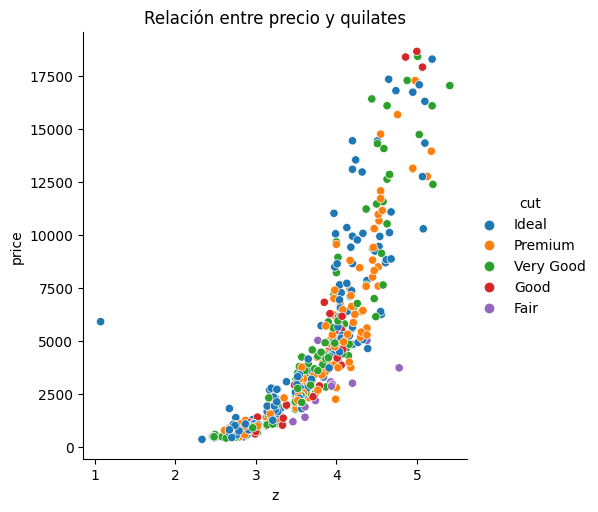

In [271]:
df_sample = df.sample(500)
sns.relplot(data=df_sample, x='z', y='price', hue='cut')
plt.title('Relación entre precio y quilates')
# "Fair", "Good", "Very goog", "Premium", "Ideal".
# En este 

Text(0.5, 1.0, 'Distribución de precios por corte de diamante')

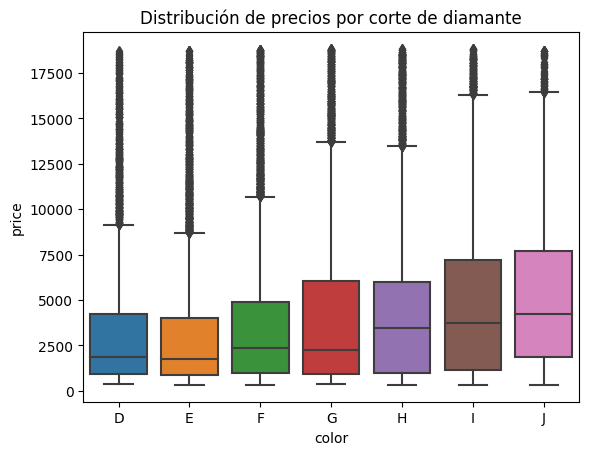

In [272]:
sns.boxplot(data=df, x='color', y='price')
plt.title('Distribución de precios por corte de diamante')

Text(0.5, 1.0, 'Distribución de precios por corte de diamante')

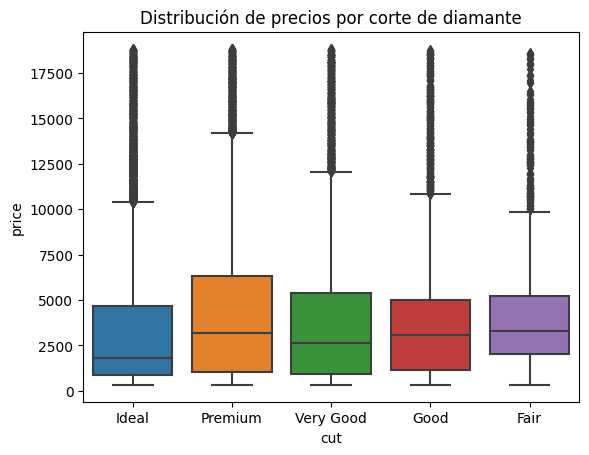

In [273]:
sns.boxplot(data=df, x='cut', y='price')
plt.title('Distribución de precios por corte de diamante')

Text(0.5, 1.0, 'Distribución de claridad por carat de diamante')

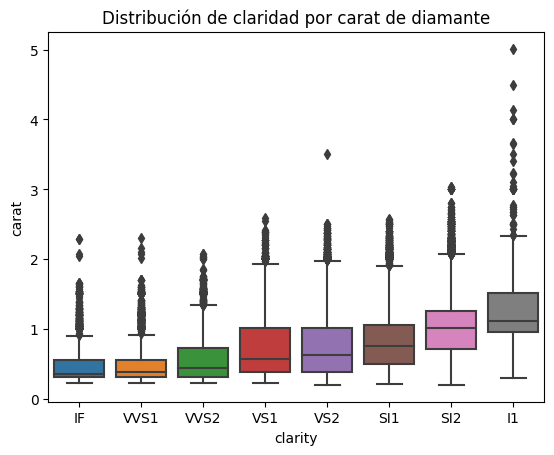

In [274]:
sns.boxplot(data=df, x='clarity', y='carat')
plt.title('Distribución de claridad por carat de diamante')

<Axes: xlabel='clarity', ylabel='price'>

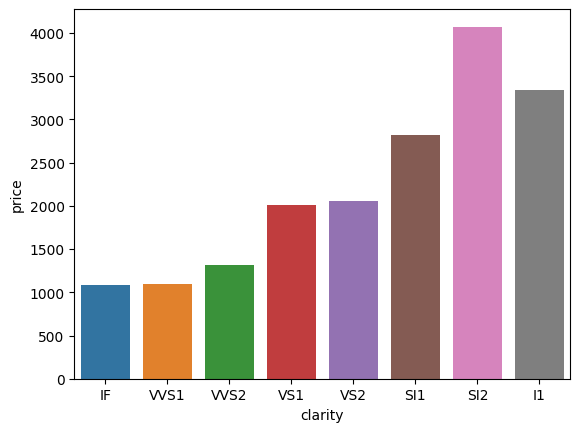

In [275]:
# calcular precio medio por clarity
df_price_by_clarity = df.groupby('clarity')['price'].median().reset_index()
sns.barplot(data=df_price_by_clarity, x='clarity', y='price',)

In [276]:
# Calcular precio por clarity

df_price_by_clarity = df.groupby('clarity')['price'].median().reset_index().sort_values('price', ascending=False)
df_price_by_clarity

,clarity,price
6,SI2,4072.0
7,I1,3344.0
5,SI1,2822.0
4,VS2,2054.0
3,VS1,2005.0
2,VVS2,1311.0
1,VVS1,1093.0
0,IF,1080.0


Text(0.5, 1.0, 'Precio promedio por cut')

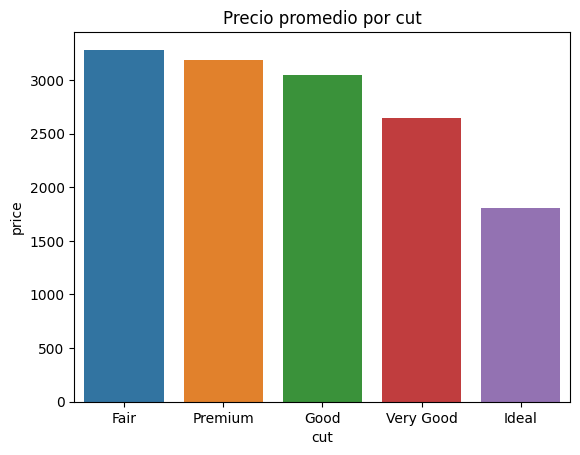

In [279]:
df_price_by_cut = df.groupby('cut')['price'].median().reset_index().sort_values('price', ascending=False)
sns.barplot(data=df_price_by_cut, x='cut', y='price', errorbar=None, order=df_price_by_cut['cut'])
plt.title('Precio promedio por cut')

## Análisis multivariante

Gráficos que analizan más de 2 variantes al mismo tiempo

* sns.boxplot
* sns.pairplot()
* sns.replot() con hue, col, row, size
* sns.heatmap()
* sns.clustermap()